## Historical meteorogy data of Phenoix park station, Dublin, Ireland
This dataset is taken from -
https://www.met.ie/climate/available-data/historical-data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as date
import math
import os
import warnings
warnings.filterwarnings('ignore')

/Users/adityapimpalkar/miniconda3/envs/tf/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
raw_data = pd.read_csv('../data/meterology/hly175.csv')

## Data processing
**Data columns description**
* date:  -  Date and Time (utc)
* rain:  -  Precipitation Amount (mm)
* temp:  -  Air Temperature (C)
* wetb:  -  Wet Bulb Temperature (C)
* dewpt: -  Dew Point Temperature (C)
* vappr: -  Vapour Pressure (hPa)
* rhum:  -  Relative Humidity (%) 
* msl:   -  Mean Sea Level Pressure (hPa)
* ind:   -  Indicator

**The dataset consists of hourly readings from year 2003-2022**

In [3]:
raw_data.head()

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl
0,16/08/03 1:00,0,0,0,9.2,0,8.9,8.5,11.1,95,1021.9
1,16/08/03 2:00,0,0,0,9,0,8.7,8.5,11.1,96,1021.7
2,16/08/03 3:00,0,0,0,8.2,0,8,7.7,10.5,96,1021.2
3,16/08/03 4:00,0,0,0,8.4,0,8.1,7.9,10.7,97,1021.2
4,16/08/03 5:00,0,0,0,7.7,0,7.5,7.3,10.2,97,1021.1


We only select columns which are important to us

In [4]:
df = raw_data[['date','rain', 'temp', 'wetb', 'dewpt', 'vappr', 'rhum', 'msl']]

Checking column datatypes

In [5]:
df.dtypes

date     object
rain     object
temp     object
wetb     object
dewpt    object
vappr    object
rhum     object
msl      object
dtype: object

Changing column type to required datatypes. Here, **errors='coerce'** turns a value into NaN if value is non-convertible or an empty string

In [6]:
df['date'] = pd.to_datetime(df['date'])
df['rain'] = pd.to_numeric(df['rain'], errors='coerce')
df['temp'] = pd.to_numeric(df['temp'], errors='coerce')
df['wetb'] = pd.to_numeric(df['wetb'], errors='coerce')
df['dewpt'] = pd.to_numeric(df['dewpt'], errors='coerce')
df['vappr'] = pd.to_numeric(df['vappr'], errors='coerce')
df['rhum'] = pd.to_numeric(df['rhum'], errors='coerce')
df['msl'] = pd.to_numeric(df['msl'], errors='coerce')

We only need data from the year 2021, so we subset the dataframe

In [7]:
met = df[(df['date'] >= '01/01/21') & (df['date'] <= '31/12/22')]

In [8]:
met = met.rename(columns = { 'date': 'datetime', 
                            "rain": "rain (mm)",
                            "temp": "Air temp (C)", 
                            "wetb": "Wet bulb temp (C)", 
                            "dewpt": "Dew Point temp (C)",
                            "vappr": "Vapor Pressure (hPa)",
                            "rhum": "Relative Humidity(%)",
                            "msl": "Mean Sea Level Pressure (hPa)"
                           })

Checking for empty values

In [9]:
met.isna().sum()

datetime                         0
rain (mm)                        0
Air temp (C)                     0
Wet bulb temp (C)                0
Dew Point temp (C)               0
Vapor Pressure (hPa)             0
Relative Humidity(%)             0
Mean Sea Level Pressure (hPa)    0
dtype: int64

In [10]:
met.describe()

,rain (mm),Air temp (C),Wet bulb temp (C),Dew Point temp (C),Vapor Pressure (hPa),Relative Humidity(%),Mean Sea Level Pressure (hPa)
count,17497.000000,17497.000000,17497.000000,17497.000000,17497.000000,17497.000000,17497.000000
mean,0.080214,10.691890,9.017483,7.238178,10.643979,80.105447,1014.719266
std,0.394045,5.387785,4.649649,4.695026,3.321295,13.231613,12.187690
min,0.000000,-5.100000,-5.400000,-7.500000,3.500000,24.000000,961.800000
25%,0.000000,7.000000,5.800000,3.800000,8.000000,72.000000,1007.200000
50%,0.000000,10.700000,9.200000,7.400000,10.300000,83.000000,1015.900000
75%,0.000000,14.600000,12.600000,10.800000,12.900000,91.000000,1023.600000
max,12.200000,32.500000,21.000000,19.000000,22.000000,100.000000,1042.200000


We have to see if there are missing days in dataset, so we can use pandas date range to create a new dataframe with entire year of 2022 and using the **difference** method we apply on our orriginal dataset to get the missing days

In [11]:
met = met.set_index('datetime')
print("We have "+ str(len(
    pd.date_range(
        start = '2021-01-01',
        end = '2022-12-31',
        freq= "1H")
    .difference(met.index)
)) + " days of data missing")
met = met.reset_index()

We have 0 days of data missing


## Visualizing trends

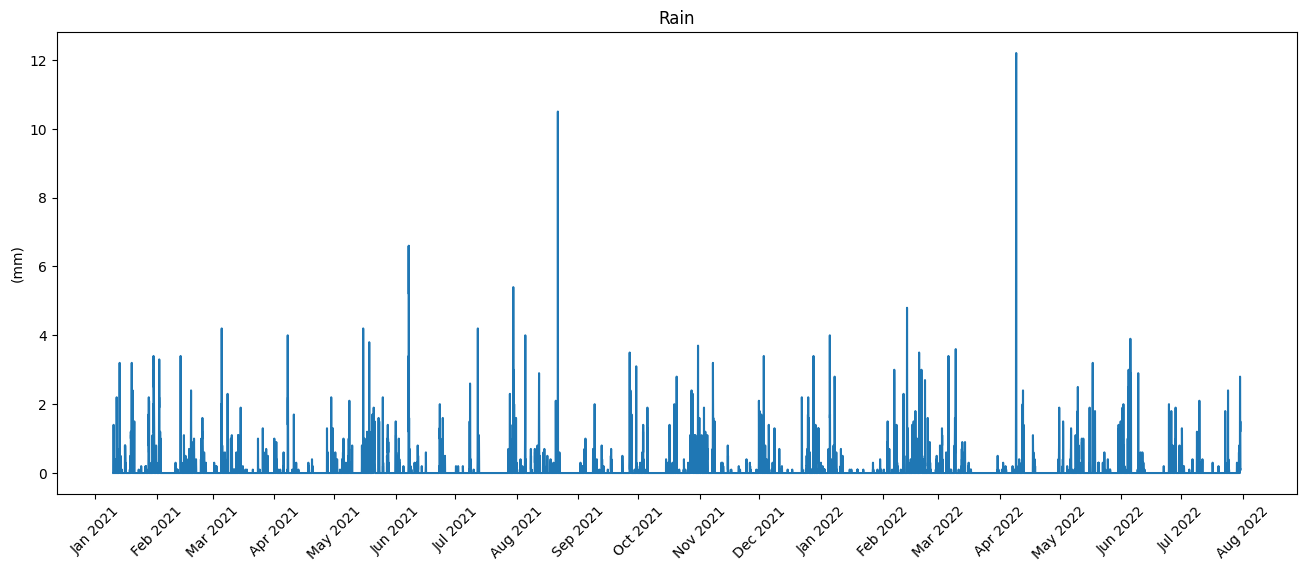

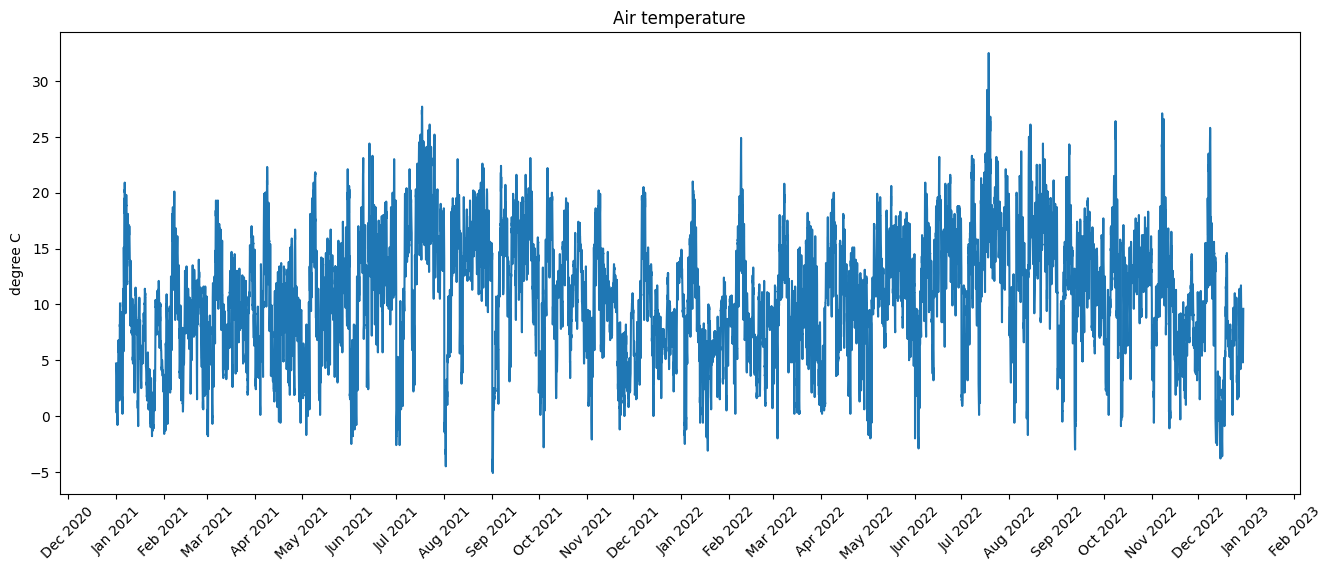

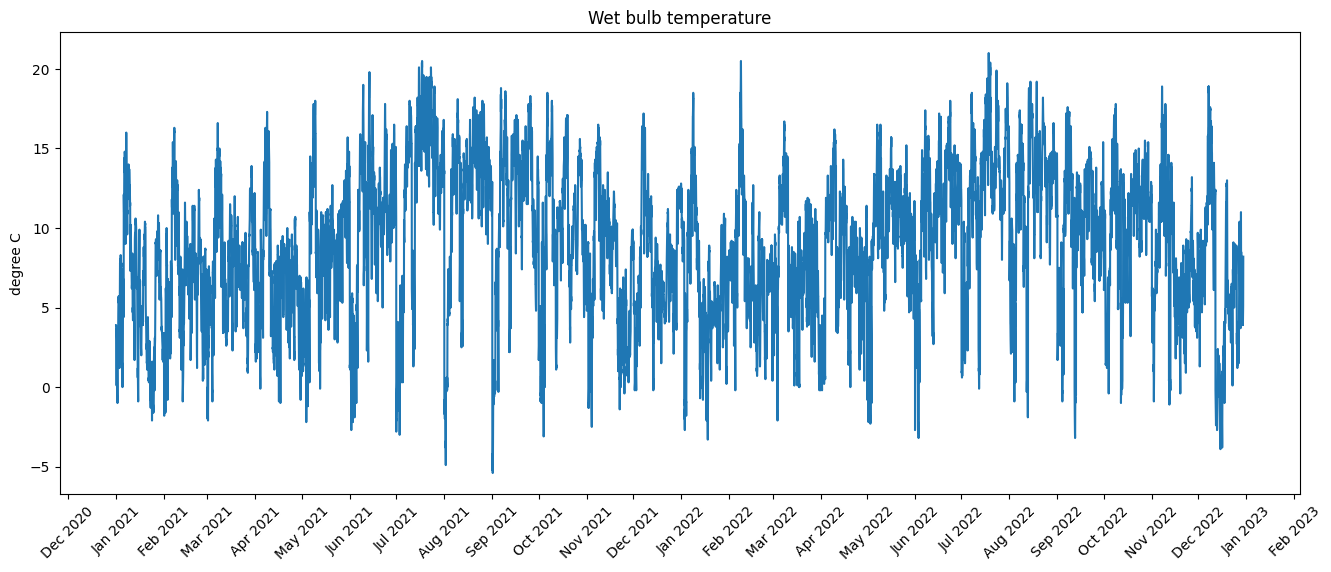

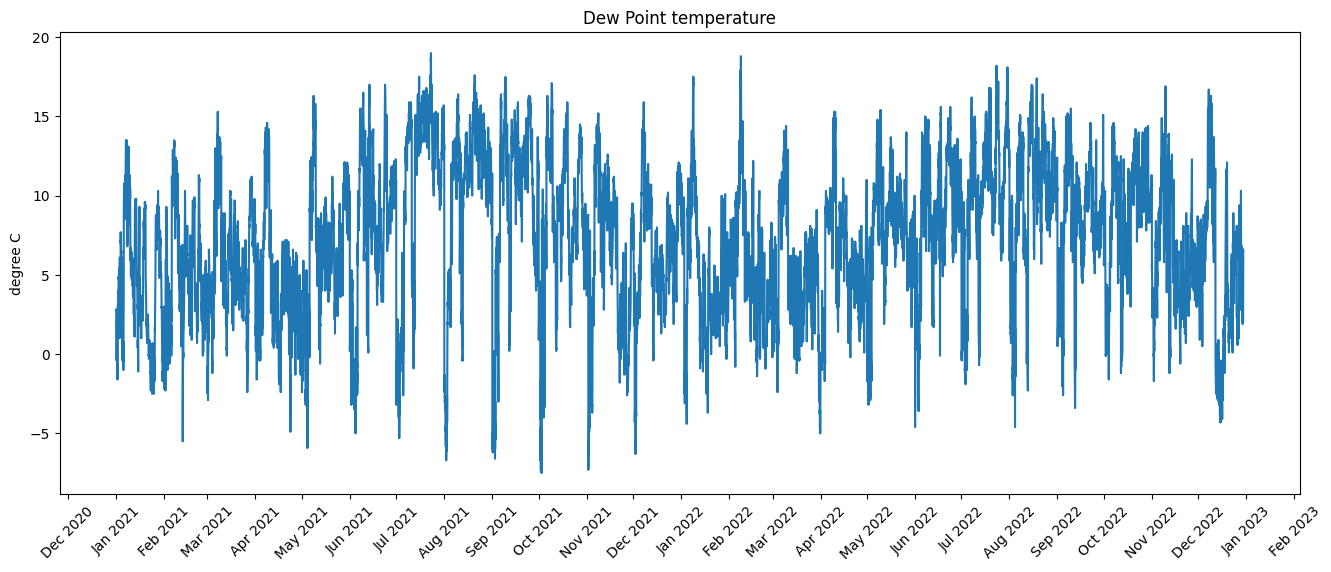

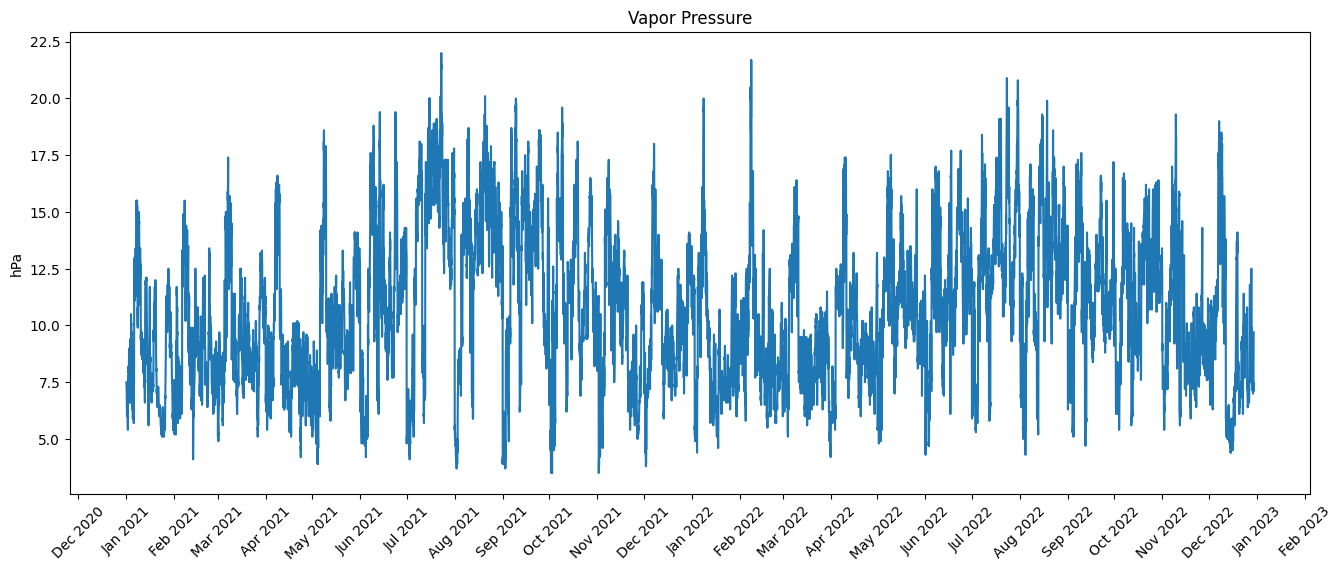

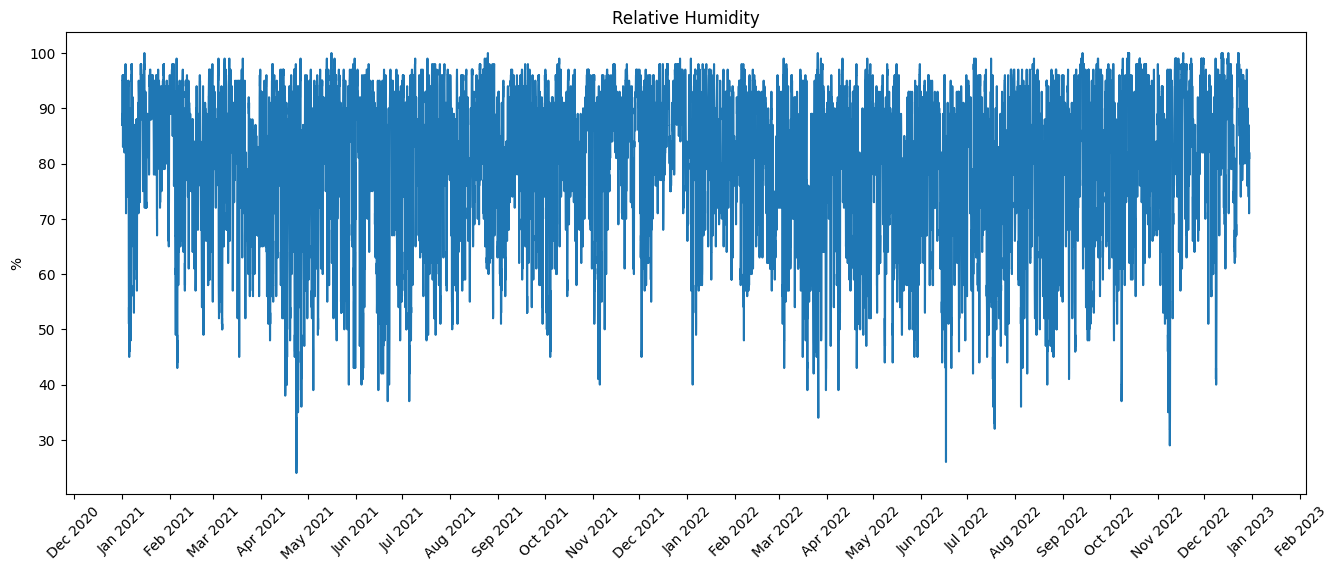

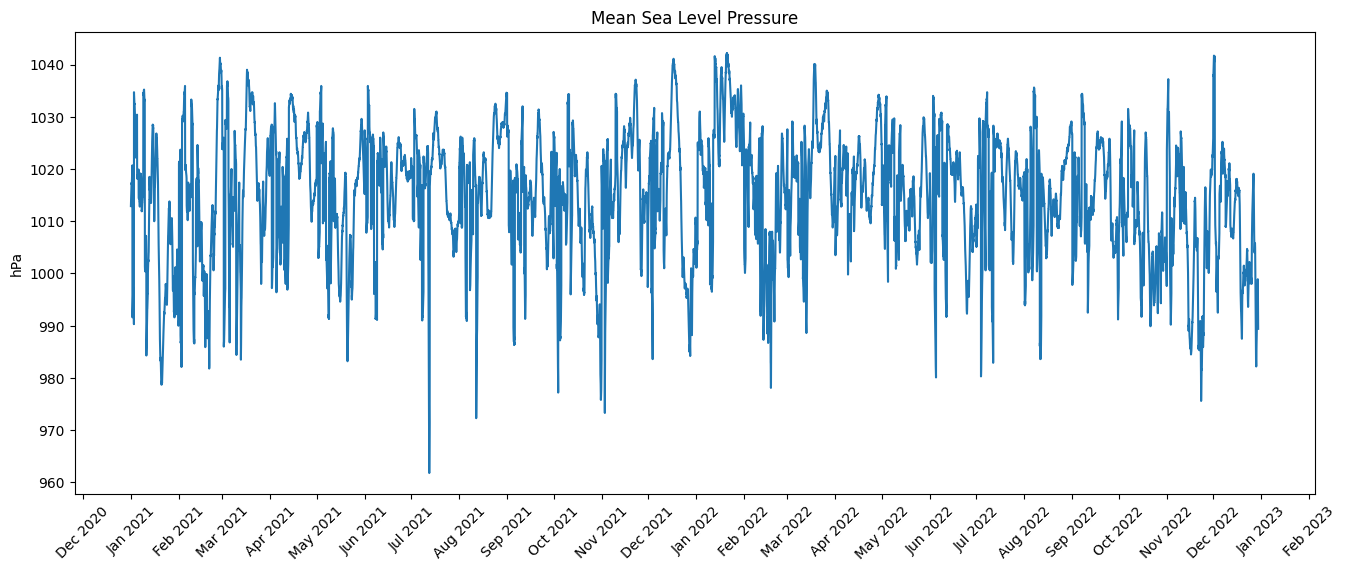

In [12]:
import matplotlib.dates as mdates

def plotline(dataset, col,fromtime, to, title, y_lab):
    timeframe = dataset[(dataset['datetime'] >= fromtime)
                         & (dataset['datetime'] <= to)]

    plt.figure(figsize=(16, 6))
    sns.lineplot(data=timeframe, x='datetime', y=col)
    plt.xlabel('')
    plt.ylabel(y_lab)
    plt.title(title)

    date_formatter = mdates.DateFormatter('%b %Y')  # Format as abbreviated month and year (e.g., Jan 2022)
    desired_tick_frequency = mdates.MonthLocator()
    # Apply the tick frequency and formatter to the x-axis
    plt.gca().xaxis.set_major_locator(desired_tick_frequency)
    plt.gca().xaxis.set_major_formatter(date_formatter)
    
    plt.xticks(rotation=45)
    
    #plt.legend()
    
    plt.show()
    
plotline(met, 'rain (mm)', '01/10/2021', '31/07/22', 'Rain', "(mm)")
plotline(met, 'Air temp (C)', '2021-01-01', '2022-12-30', 'Air temperature', "degree C")
plotline(met, 'Wet bulb temp (C)', '2021-01-01', '2022-12-30', 'Wet bulb temperature', "degree C")
plotline(met, 'Dew Point temp (C)', '2021-01-01', '2022-12-30', 'Dew Point temperature', "degree C")
plotline(met, 'Vapor Pressure (hPa)', '2021-01-01', '2022-12-30', 'Vapor Pressure', "hPa")
plotline(met, 'Relative Humidity(%)', '2021-01-01', '2022-12-30', 'Relative Humidity', "%")
plotline(met, 'Mean Sea Level Pressure (hPa)', '2021-01-01', '2022-12-30', 'Mean Sea Level Pressure', "hPa")

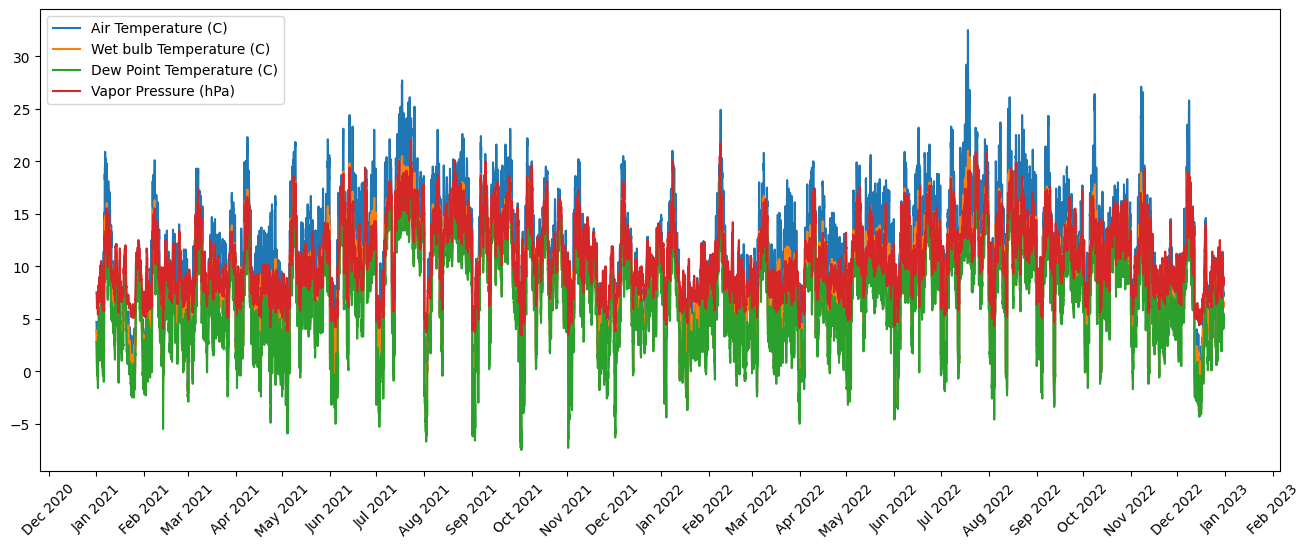

In [13]:
final_met = met[(met['datetime'] >= '2021-01-01')
                         & (met['datetime'] <= '2022-12-31')]

plt.figure(figsize=(16, 6))
sns.lineplot(data=final_met, x='datetime', y='Air temp (C)', label='Air Temperature (C)')
sns.lineplot(data=final_met, x='datetime', y='Wet bulb temp (C)', label='Wet bulb Temperature (C)')
sns.lineplot(data=final_met, x='datetime', y='Dew Point temp (C)', label='Dew Point Temperature (C)')
sns.lineplot(data=final_met, x='datetime', y='Vapor Pressure (hPa)', label='Vapor Pressure (hPa)')
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.legend()

date_formatter = mdates.DateFormatter('%b %Y')  # Format as abbreviated month and year (e.g., Jan 2022)
desired_tick_frequency = mdates.MonthLocator()
# Apply the tick frequency and formatter to the x-axis
plt.gca().xaxis.set_major_locator(desired_tick_frequency)
plt.gca().xaxis.set_major_formatter(date_formatter)
plt.xticks(rotation=45)

#plt.legend()

plt.show()

In [14]:
final_met = final_met.rename(columns = {
                            "rain (mm)": "rain",
                            "Air temp (C)": "temp", 
                            "Wet bulb temp (C)": "wetb", 
                            "Dew Point temp (C)": "dewpt",
                            "Vapor Pressure (hPa)": "vappr",
                            "Relative Humidity(%)": "rhum",
                            "Mean Sea Level Pressure (hPa)": "msl"
                           })

In [15]:
final_met.to_csv('../data/meterology.csv')